In [11]:
import numpy as np
import tensorflow as tf
import matplotlib.pylab as plt

from keras.models import Sequential
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

train_images = train_images.reshape((50000, 32, 32, 3))
test_images = test_images.reshape((10000, 32, 32, 3))

train_images = train_images / 255.0
test_images = test_images / 255.0

one_hot_train_labels = to_categorical(train_labels, 10)
one_hot_test_labels = to_categorical(test_labels, 10)

class_names = ['airplane', 'automobile', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck']

#model
model = Sequential()
#convolution layer - 3x3x32
model.add(tf.keras.layers.Conv2D(
        32,
        (3, 3),
        activation = 'relu',
        strides = (1, 1),
        padding = 'valid',
        input_shape = (32, 32, 3)
        ))
#dropout
model.add(tf.keras.layers.Dropout(0.2))
#batch normalization
#model.add(tf.keras.layers.BatchNormalization())
#max pooling layer
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
#convolution layer - 3x3x64
model.add(tf.keras.layers.Conv2D(
    64,
    (3, 3),
    activation = 'relu'
))
#max pooling
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
#conv - 3x3x128
model.add(tf.keras.layers.Conv2D(
    128,
    (3, 3),
    activation = 'relu'
))
#max pooling
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

#Flatten & FC layer
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation = 'relu'))
model.add(tf.keras.layers.Dense(32, activation = 'relu'))
#FC layer
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

#compile
model.compile(
    optimizer = tf.optimizers.Adam(0.001),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
    )

model.summary()

history = model.fit(train_images, one_hot_train_labels, epochs = 10, batch_size = 64, validation_split = 0.2)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 dropout_2 (Dropout)         (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 4, 4, 128)        

313/313 [==============================] - 1s 3ms/step - loss: 0.9305 - accuracy: 0.6832
Accuracy : 0.683200


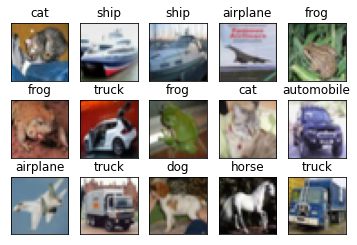

In [12]:
#predict, evaluate
import numpy as np

labels = model.predict(test_images)

print("Accuracy : %4f" %(model.evaluate(test_images, one_hot_test_labels)[1]))

fig = plt.figure()
for i in range(15):
  subplot = fig.add_subplot(3, 5, i + 1)
  subplot.set_xticks([])
  subplot.set_yticks([])
  subplot.set_title(class_names[np.argmax(labels[i])])
  subplot.imshow(test_images[i].reshape(32, 32, 3))
plt.show()